# What is Artificial Neural Network?

The term "Artificial Neural Network" is derived from Biological neural networks that develop the structure of a human brain. Similar to the human brain that has neurons interconnected to one another, artificial neural networks also have neurons that are interconnected to one another in various layers of the networks. These neurons are known as nodes.

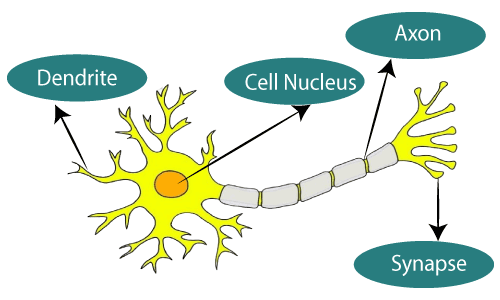

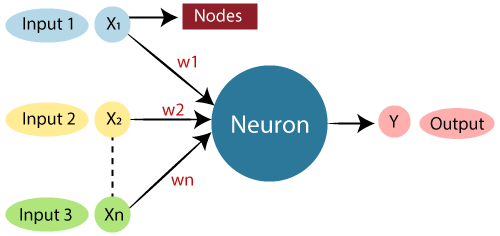

Relationship between Biological neural network and artificial neural network:

Biological Neural Network	Artificial Neural Network
Dendrites	Inputs
Cell nucleus	Nodes
Synapse	Weights
Axon	Output

In [17]:
!pip install tensorflow

     ------------------------------------ 266.3/266.3 MB 642.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 976.7 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.6 MB/s eta 0:00:00
     ------------------------------------ 177.8/177.8 kB 765.1 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 kB 897.7 kB/s eta 0:00:00
     ------------------------------------ 15

In [14]:
!pip install keras

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv') 
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 we will create the matrix of feature, which is nothing but a matrix of the independent variable. Since we don't know which independent variable might has the most impact on the dependent variable, so that is what our artificial neural network will spot by looking at the correlations; it will give bigger weight to those independent variables that have the most impact in the neural network.

So, we will include all the independent variables from the credit score to the last one that is the estimated salary.

In [5]:
X = dataset.iloc[:, 3:13].values  


we will see that we have successfully created the matrix of feature X. Next, we will create a dependent variable vector.

In [6]:
y = dataset.iloc[:, 13].values 


Next, we will split the dataset into the training and test set. But before that, we need to encode that matrix of the feature as it contains the categorical data. Since the dependent variable also comprises of categorical data but sidewise, it also takes a numerical value, so don't need to encode text into numbers. But then again, we have our independent variable, which has categories of strings, so we need to encode the categorical independent variables.

The main reason behind encoding the categorical data before splitting is that it is must to encode the matrix of X and the dependent variable y.

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  

print(X)

labelencoder_X_1 = LabelEncoder()  
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1]) 

labelencoder_X_2 = LabelEncoder()  
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])  

print(X)


[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  


Besides parallel computations, we are going to have highly computed intensive calculations as well as we don't want one independent variable dominating the other one, so we will be applying feature scaling to ease out all the calculations.

In [9]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

After executing the above code, we can have a quick look at X_train and X_test to check if all the independent variables are scaled properly or not.

Part2: Building an ANN
We will start with importing the Keras libraries as well as the desired packages as it will build the Neural Network based on TensorFlow

     ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00


In [16]:
import keras

ModuleNotFoundError: No module named 'tensorflow'

After importing the Keras library, we will now import two modules, i.e., the Sequential module, which is required to initialize our neural network, and the Dense module that is needed to build the layer of our ANN.

In [48]:
from keras.models import Sequential  
from keras.layers import Dense  

Next, we will initialize the ANN, or simply we can say we will be defining it as a sequence of layers. The deep learning model can be initialized in two ways, either by defining the sequence of layers or defining a graph. Since we are going to make our ANN with successive layers, so we will initialize our deep learning model by defining it as a sequence of layers.

It can be done by creating an object of the sequential class, which is taken from the sequential model. The object that we are going to create is nothing but the model itself, i.e., a neural network that will have a row of classifiers because we are solving a classification problem where we have to predict a class, so our neural network model is going to be a classifier. As in the next step, we will be predicting the test set result using the classifier name, so we will call our model as a classifier that is nothing but our future Artificial Neural Network that we are going to build.

Since this classifier is an object of Sequential class, so we will be using it, but will not pass any argument because we will be defining the layers step by step by starting with the input layer followed by adding some hidden layers and then the output layer.

In [49]:
classifier = Sequential()   


After this, we will start by adding the input layer and the first hidden layer. We will take the classifier that we initialized in the previous step by creating an object of the sequential class, and we will use the add() method to add different layers in our neural network. In the add(), we will pass the layer argument, and since we are going to add two layers, i.e., the input and first hidden layer, which we will be doing with the help of Dense() function that we have mentioned above.

Within the Dense() function we will pass the following arguments;

units are the very first argument, which can be defined as the number of nodes that we want to add in the hidden layer.
The second argument is the kernel_initializer that randomly initializes the weight as a small number close to zero so that they can be randomly initialized with a uniform function. Here we have a simple uniform function that will initialize the weight according to the uniform distribution.
The third argument is the activation, which can be understood as the function that we want to choose in our hidden layer. So, we will be using the rectifier function for the hidden layers and the sigmoid function for the output layer. Since we are in the hidden layer, we are using the "relu" perimeter as it corresponds to the rectifier function.
And the last is the input_dim argument that specifies the number of nodes in the input layer, which is actually the number of independent variables. It is very necessary to add the argument because, by so far, we have only initialized our ANN, we haven't created any layer yet, and that's why it doesn't know which node this hidden layer we are creating is expecting as inputs. After the first hidden layer gets created, we don't need to specify this argument for the next hidden layers.

In [50]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))  

Next, we will add the second hidden layer by using the same add method followed by passing the same parameter, which is the Dense() as well as the same parameters inside it as we did in the earlier step except for the input_dim

In [51]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))  

After adding the two hidden layers, we will now add the final output layer. This is again similar to the previous step, just the fact that we will be units parameter because in the output layer we only require one node as our dependent variable is a categorical variable encompassing a binary outcome and also when we have binary outcome then, in that case, we have only one node in the output layer. So, therefore, we will put units equals to 1, and since we are in the output layer, we will be replacing the rectifier function to sigmoid activation function.

In [52]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))  

As we are done with adding the layers of our ANN, we will now compile the whole artificial neural network by applying the stochastic gradient descent. We will start with our classifier object, followed by using the compile method and will pass on the following arguments in it.

The first argument is the optimizer, which is simply the algorithm that we want to use to find the optimal set of weights in the neural networks. The algorithm that we are going to use is nothing but the stochastic gradient descent algorithm. Since there are several types of stochastic descent algorithms and the most efficient one is called "adam," which is going to be the input of this optimizer parameter.
The second parameter is the loss, which is a loss function within the stochastic gradient descent algorithm, which is used to find the optimal weights. Since our dependent variable has a binary outcome, so we will be using binary_crossentropy logarithmic function, and when there is a binary outcome, then we will incorporate categorical_crossentropy.
The last argument will be the metrics, which is nothing but a criterion to evaluate our model, and we are using the "accuracy." So, what happens is when the weights are updated after each observation, the algorithm makes use of this accuracy to improve the model's performance.

In [53]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Next, we will fit the ANN to the training set for which we will be using the fit method to fit our ANN to the training set. In the fit method, we will be passing the following arguments:

The first argument is the dataset on which we want to train our classifier, which is the training set separated into two-argument such as X_train (matrix of feature containing the observations of the train set) and y_train (containing the actual outcomes of the dependent variable for all the observations in the training set).
The next argument is the batch_size, which is the number of observations, after which we want to update the weight.
And lastly, the no. of epochs that we are going to apply to see the algorithm in action as well the improvement in accuracy over the different epochs.

In [54]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)  

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4950 - accuracy: 0.7956
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4348 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4309 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8167
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4209 - accuracy: 0.8251
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.8300
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4169 - accuracy: 0.8313
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4153 - accuracy: 0.8325
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4137 - accura

rom the output image given above, you can see that our model is ready and has reached an accuracy of 84% approximately, so this how a stochastic gradient descent algorithm is performed.

### Part3: Making the Predictions and Evaluating the Model
Since we are done with training the ANN on the training set, now we will make the predictions on the set.

In [36]:
y_pred = classifier.predict(X_test) 
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.15810065],
       [0.24393553],
       [0.2076406 ],
       ...,
       [0.17284797],
       [0.11557496],
       [0.14938936]], dtype=float32)

From the output image given above, we can see all the probabilities that the 2,000 customers of the test set will leave the bank. For example, if we have a look at first probability, i.e., 21% means that this first customer of the test set, indexed by zero, has a 20% chance to leave the bank.

Since the predicted method returns the probability of the customers leave the bank and in order to use this confusion matrix, we don't need these probabilities, but we do need the predicted results in the form of True or False. So, we need to transform these probabilities into the predicted result.

We will choose a threshold value to decide when the predicted result is one, and when it is zero. So, we predict 1 over the threshold and 0 below the threshold as well as the natural threshold that we will take is 0.5, i.e., 50%. If the y_pred is larger, then it will return True else False.

In [37]:
y_pred = (y_pred > 0.5)   

print(np.unique(y_pred, return_counts=True))

(array([False,  True]), array([1793,  207], dtype=int64))


Now, if we have a look at y_pred, we will see that it has updated the results in the form of "False" or "True".

So, the first five customers of the test set don't leave the bank according to the model, whereas the sixth customer in the test set leaves the bank.

Next, we will execute the following code to get the confusion matrix.

In [38]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
cm

array([[1538,   57],
       [ 255,  150]], dtype=int64)

From the output given above, we can see that out of 2000 new observations; we get 1530+155= 1685 correct predictions 250+65= 305 incorrect predictions.

So, now we will compute the accuracy on the console, which is the number of correct predictions divided by the total number of predictions.

In [39]:
print(1685/2000)

0.8425


So, we can see that we got an accuracy of 84% on new observations on which we didn't train our ANN, even that get a good amount of accuracy. Since this is the same accuracy that we obtained in the training set but obtained here on the test set too.

So, eventually, we can validate our model, and now the bank can use it to make a ranking of their customers, ranked by their probability to leave the bank, from the customer that has the highest probability to leave the bank, down to the customer that has the lowest probability to leave the bank.